In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter

In [2]:
dir = 'C:/_dados/'

In [3]:
train = pd.read_csv(dir + 'train.csv', sep=',',index_col=0, dtype={11:'str',12:'str'})
test = pd.read_csv(dir + 'test.csv', sep=',',index_col=0, dtype={11:'str',12:'str'})
resources = pd.read_csv(dir + 'resources.csv', sep=',',index_col=0)

In [4]:
train.tail()

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
id,,,,,,,,,,,,,,,
p014188,dd05465e8daad481c9be9e61e147c9cd,Mr.,NM,2016-10-07 16:13:32,Grades 6-8,Math & Science,Mathematics,Math is Fun!!,I currently teach math in a low-income school ...,Students seem to get board with math quickly a...,NaN,NaN,My students need a way to have fun while worki...,1,1
p116452,40762708f7589d161ae883dede98a6a1,Mr.,AZ,2017-03-11 23:58:31,Grades 9-12,Music & The Arts,Performing Arts,"\""Sew\"" you think you can design costumes!",My students are predominantly Hispanic and oft...,I was taken back earlier in the year when I br...,NaN,NaN,My students need this serger to make our costu...,0,1
p074761,3429d29ecba4a37ac5bd69ded4aab341,Mrs.,AZ,2017-02-09 15:42:43,Grades 6-8,Math & Science,"Applied Sciences, Environmental Science",Sustainable Classroom,I teach science to eighth graders at a suburba...,"With this project, students will be able to ma...",NaN,NaN,"My students need a vinyl machine, button maker...",48,0
p136737,497ba7027394d6490d2d2b34af2db5fd,Mrs.,FL,2016-12-28 14:20:07,Grades PreK-2,Literacy & Language,Literacy,Can I go to the library?,I work with a group of wonderful second grade ...,Have you ever went to the library to find a go...,NaN,NaN,My students need 3 shelf organizers to have a ...,29,1
p190772,337bc63eccf6f6ee26e727a1f18b80f4,Ms.,TX,2016-05-15 20:25:14,Grades 3-5,Literacy & Language,Literacy,Reader Leaders!,Balanced literacy was a mystery to me until a ...,"At the beginning of the school year, the readi...",My students will be able to listen to books re...,Donations to this project will help my student...,My students need a literacy listening center w...,1,1


In [5]:
test.tail()

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
id,,,,,,,,,,,,,,
p183993,be39c3d9b26cbb91f20435ba45e8451e,Mrs.,AL,2017-04-07 07:48:40,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",iPad Intelligence,I teach a diverse group of creative kindergart...,My students will use the Apple iPad mini durin...,NaN,NaN,My students need one iPad mini to enhance thei...,14
p116343,90957869296e26198b1f162f169f8a55,Ms.,NM,2017-04-25 17:46:26,Grades PreK-2,"Warmth, Care & Hunger","Warmth, Care & Hunger",Clean Clothes Center- Finishing the Cycle,Many of our families do not have access to was...,This clothes dryer will allow students that ha...,NaN,NaN,My students need a clothes dryer to supplement...,1
p210728,692376a473aaf753890e329081b5787c,Mrs.,CA,2017-04-17 17:53:12,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing",Everyday Authors Among Us,My 6th grade students are a lively bunch of in...,"Every year, my 6th grade students write and pu...",NaN,NaN,My students need a variety of materials to use...,4
p060531,0fcaec76e9ea1730e81f2ca8eae5891b,Mrs.,OR,2017-04-19 12:11:59,Grades 3-5,"Warmth, Care & Hunger","Warmth, Care & Hunger",Coat Lockers for Our Classroom!,In our classroom students celebrate their indi...,"At this time, my students place their personal...",NaN,NaN,"My students need coat lockers, so they have a ...",9
p087783,d3fd1b7b0efff1eddbd3fbfe4c00711e,Mrs.,IN,2017-04-27 19:50:35,Grades 3-5,"Literacy & Language, Math & Science","Literacy, Mathematics",A Coffee Shop Classroom,I am a teacher in a Title 1 K-5 elementary sch...,I am gradually switching my classroom from tra...,NaN,NaN,My students need flexible seating arrangements...,0


In [6]:
print(test.columns,'\n',train.columns,'\n',resources.columns)

Index(['teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects'],
      dtype='object') 
 Index(['teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object') 
 Index(['description', 'quantity', 'price'], dtype='object')


In [7]:
train.groupby('project_subject_categories')['project_is_approved'].mean().sort_values(ascending = False)

project_subject_categories
Warmth, Care & Hunger                         0.921953
Health & Sports, Warmth, Care & Hunger        0.903226
History & Civics, Health & Sports             0.900000
Literacy & Language, History & Civics         0.890494
History & Civics, Literacy & Language         0.885490
Literacy & Language                           0.869858
Literacy & Language, Math & Science           0.867219
Music & The Arts, Special Needs               0.863830
Applied Learning, Literacy & Language         0.861208
Health & Sports, Special Needs                0.861064
Math & Science, Literacy & Language           0.861046
Literacy & Language, Applied Learning         0.859345
Math & Science, History & Civics              0.858326
Literacy & Language, Special Needs            0.854450
History & Civics, Math & Science              0.853333
Health & Sports, Applied Learning             0.851852
Music & The Arts                              0.850006
Health & Sports, Math & Science       

In [8]:
train.groupby(['project_subject_categories','project_subject_subcategories'])['project_is_approved'].mean().sort_values(ascending = False)

project_subject_categories               project_subject_subcategories             
Health & Sports, Applied Learning        Nutrition Education, Parent Involvement       1.000000
Applied Learning, Health & Sports        Character Education, Nutrition Education      1.000000
Math & Science, History & Civics         Environmental Science, Financial Literacy     1.000000
History & Civics, Music & The Arts       Economics, Music                              1.000000
Applied Learning, Health & Sports        Other, Team Sports                            1.000000
History & Civics, Music & The Arts       Financial Literacy, Performing Arts           1.000000
Health & Sports, Applied Learning        Gym & Fitness, Parent Involvement             1.000000
Literacy & Language, Applied Learning    Foreign Languages, Parent Involvement         1.000000
Applied Learning, Warmth, Care & Hunger  Parent Involvement, Warmth, Care & Hunger     1.000000
Applied Learning, Health & Sports        Parent Invo

In [9]:
resources.tail()

,description,quantity,price
id,,,
p031981,AmazonBasics 9 Volt Everyday Alkaline Batterie...,1,9.99
p031981,AmazonBasics AAA Performance Alkaline Batterie...,1,6.99
p031981,Black Electrical Tape (GIANT 3 PACK) Each Roll...,6,8.99
p031981,Flormoon DC Motor Mini Electric Motor 0.5-3V 1...,2,8.14
p031981,WAYLLSHINE 6PCS 2 x 1.5V AAA Battery Spring Cl...,2,7.39


In [10]:
resources['total'] = resources.quantity * resources.price
expenses = resources.groupby('id')['total'].sum()
expenses.head()

id
p000001     833.63
p000002     630.28
p000003     298.97
p000004    1126.22
p000005     702.31
Name: total, dtype: float64

In [11]:
number_of_items = resources.groupby('id')['total'].count()
number_of_items.head()

id
p000001     4
p000002    14
p000003     4
p000004    95
p000005     4
Name: total, dtype: int64

In [12]:
train2 = train.join(expenses)
train2 = train2.join(number_of_items,rsuffix='1')
train2.rename(columns={'total1':'qnty'}, inplace=True)
train2

,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,total,qnty
id,,,,,,,,,,,,,,,,,
p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,899.94,2
p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,400.00,1
p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,469.99,1
p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,684.47,5
p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,711.00,1
p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,727.36,2
p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,2016-08-31 00:30:43,Grades PreK-2,Health & Sports,Health & Wellness,Active Kindergartners,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,414.02,2
p181781,c71f2ef13b4bc91afac61ca8fd4c0f9f,Mrs.,SC,2016-08-03 13:26:01,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",Fabulous Firsties-Wiggling to Learn!,First graders are fantastic! They are excited ...,First graders love learning! We need 6 wiggle-...,NaN,NaN,My students need wiggle stools to allow them t...,0,1,414.78,1
p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,I have used alternative seating in my classroo...,NaN,NaN,My students need seating that allows the most ...,13,1,319.80,1


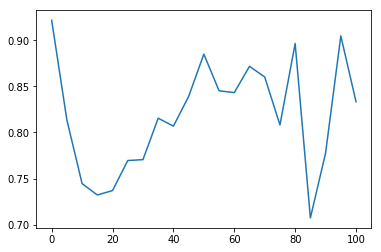

In [13]:
q = train2.groupby(round(train2['qnty']/5,0)*5)['project_is_approved'].mean()
plt.plot(q)

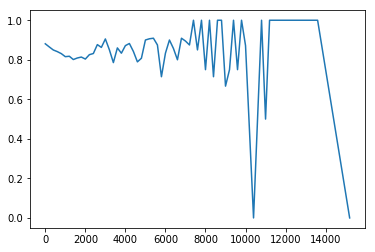

In [14]:
train2['total_rounded'] = round(train2['total'],-2)
t = train2.groupby(round(train2['total_rounded']/200,0)*200)['project_is_approved'].mean()
plt.plot(t)

In [15]:
text = train2.index+';'+train2['project_is_approved'].astype(str)+';'+train2['project_essay_1'].astype(str)+train2['project_essay_2'].astype(str)+train2['project_essay_3'].astype(str)+train2['project_essay_4'].astype(str)
text[0]

'p036502;1;Most of my kindergarten students come from low-income households and are considered \\"at-risk\\". These kids walk to school alongside their parents and most have never been further than walking distance from their house. For 80% of my students, English is not their first language or the language spoken at home. \\r\\n\\r\\nWhile my kindergarten kids have many obstacles in front of them, they come to school each day excited and ready to learn. Most students started the year out never being in a school setting. At the start of the year many had never been exposed to letters. Each day they soak up more knowledge and try their hardest to succeed. They are highly motivated to learn new things every day. We are halfway through the year and they are starting to take off. They know know all letters, some sight words, numbers to 20, and a majority of their letter sounds because of their hard work and determination. I am excited to see the places we will go from here!I currently have

In [16]:
with open(dir+'consolidado_1.txt', 'w') as t1: pass
with open(dir+'consolidado_0.txt', 'w') as t0: pass
with open(dir+'consolidated_text.txt', 'w') as ct: pass

with open(dir+'consolidado_1.txt', 'w+') as t1:
    with open(dir+'consolidated_text.txt', 'w+') as ct:
        with open(dir+'consolidado_0.txt', 'w+') as t0:
            for line in text:
                try:
                    idx,approved,line = line.split(';',2)
                    with open(dir+'files\_' + approved + '\\' + idx +'.txt', 'w') as f:
                        clean_line = line.upper()
                        clean_line = re.sub("\\\\[RNT]", "", clean_line)
                        clean_line = re.sub("[^A-Z ]+", " ", clean_line)
                        clean_line = re.sub("\s\s+", " ", clean_line)
                        clean_line = re.sub("NANNAN", "", clean_line)
                        ct.write(str(idx)+';'+str(clean_line) + '\n')
                        con = Counter(clean_line.split()).items()
                        for item in con:
                            a,b = item
                            f.write(str(a) + ' ' + str(b) + '\n')
                            if approved == '1':
                                t1.write(str(a) + ' ' + str(b) + '\n')
                            else:
                                t0.write(str(a) + ' ' + str(b) + '\n')
                except:
                    print('.', end='',flush=True)

In [17]:
with open(dir+'consolidado_0.txt', 'r') as t0:
    sorted_file = sorted(t0)
with open(dir+'consolidado_0_sorted.txt', 'w') as f:
    f.writelines(sorted_file)

In [18]:
with open(dir+'consolidado_1.txt', 'r') as t1:
    sorted_file = sorted(t1)
with open(dir+'consolidado_1_sorted.txt', 'w') as f:
    f.writelines(sorted_file)

In [19]:
approved = pd.read_csv(dir+'consolidado_1_sorted.txt', sep = ' ', header=None)
not_approved = pd.read_csv(dir+'consolidado_0_sorted.txt', sep = ' ', header=None)

In [20]:
asum = approved.groupby(0)[1].sum()
bsum = not_approved.groupby(0)[1].sum()

In [21]:
acount = approved.groupby(0)[1].count()
bcount = not_approved.groupby(0)[1].count()

a = len(acount)
b = len(bcount)

In [22]:
c = pd.concat([acount,asum,bcount,bsum], keys=['approved_count','approved_sum','not_approved_count',
                                               'not_approved_sum'], axis=1).fillna(0)
c['sum_count'] = c['approved_count'] + c['not_approved_count']
c['sum_sum'] = c['approved_sum'] + c['not_approved_sum']
c = c[(c['sum_count'] > 3) & (c['not_approved_sum'] >1)]  
c['importance'] = (c['approved_count']*b - c['not_approved_count']*a) / (c['sum_count']*(a+b))
c['importance_sq'] = c['importance']  * c['importance'] 
c.sort_values('importance_sq', ascending=False, inplace=True)
c.to_pickle('DONORSCHOOSE\words.pickle')
c = c.head(16000)
c

,approved_count,approved_sum,not_approved_count,not_approved_sum,sum_count,sum_sum,importance,importance_sq
MCDONOUGH,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SUNDAE,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SLAMMING,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SURPLUSSED,0.0,0.0,5.0,5.0,5.0,5.0,-0.656099,0.430466
OPPOSITIONS,1.0,1.0,7.0,7.0,8.0,8.0,-0.531099,0.282066
DECLARES,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
MAPP,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
EVERYTHINV,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
ENROLMENT,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
REVERED,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026


In [23]:
c = pd.read_pickle('DONORSCHOOSE\words.pickle')

In [24]:
c

,approved_count,approved_sum,not_approved_count,not_approved_sum,sum_count,sum_sum,importance,importance_sq
MCDONOUGH,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SUNDAE,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SLAMMING,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SURPLUSSED,0.0,0.0,5.0,5.0,5.0,5.0,-0.656099,0.430466
OPPOSITIONS,1.0,1.0,7.0,7.0,8.0,8.0,-0.531099,0.282066
DECLARES,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
MAPP,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
EVERYTHINV,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
ENROLMENT,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
REVERED,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026


In [28]:
c[c.importance <0]

,approved_count,approved_sum,not_approved_count,not_approved_sum,sum_count,sum_sum,importance,importance_sq
MCDONOUGH,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SUNDAE,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SLAMMING,0.0,0.0,4.0,4.0,4.0,4.0,-0.656099,0.430466
SURPLUSSED,0.0,0.0,5.0,5.0,5.0,5.0,-0.656099,0.430466
OPPOSITIONS,1.0,1.0,7.0,7.0,8.0,8.0,-0.531099,0.282066
DECLARES,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
MAPP,1.0,1.0,5.0,5.0,6.0,6.0,-0.489433,0.239544
EVERYTHINV,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
ENROLMENT,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
REVERED,1.0,1.0,4.0,4.0,5.0,5.0,-0.456099,0.208026
